In [2]:
import joblib as joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import History
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from tools import data_parser as dp

In [2]:
bert_data_72 = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data_72)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=403)

In [10]:
df

,4,13,31,34,52,53,56,62,75,82,...,434,441,451,464,472,476,485,495,508,511
0,-29.141940,-11.528331,-143.155170,107.593940,-44.526806,0.528456,42.838710,81.244380,16.177069,-41.486730,...,111.09079,-69.724060,-94.094090,11.622316,16.300495,96.385890,10.527961,-50.240147,13.266889,101.221860
1,84.637405,161.983290,-79.785250,150.757980,-66.567620,140.765200,75.919586,-34.040672,-76.232930,-66.692690,...,345.29916,-4.309899,-77.737390,-8.781374,-106.667120,-40.479317,46.701714,-73.757904,10.331673,36.679665
2,31.603592,246.895390,7.157277,123.615974,-26.929350,34.784454,114.004960,-18.788340,28.471226,30.032003,...,266.45840,-39.091260,16.124104,51.578980,-44.444218,1.496801,-32.732315,-64.446144,54.983738,25.961790
3,265.647060,23.445145,-136.177260,143.916280,-116.791340,160.164340,12.813471,27.227333,61.147842,103.804790,...,218.42584,-125.526100,3.252994,-30.185379,36.616356,17.927720,-104.530870,-60.669160,178.540830,92.937530
4,-5.213447,-42.506924,9.523516,173.188860,-12.029865,152.627980,95.537160,-17.649742,26.673891,-75.413120,...,313.12732,-116.810780,35.905895,-112.568830,-105.216705,9.410617,31.512688,-7.415275,-78.872030,-32.607390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,62.723007,33.959984,-66.831020,71.336970,-15.538242,96.123160,14.908083,-39.385548,17.548166,-70.920180,...,331.29170,-76.066740,-36.919758,14.659348,-164.339920,-6.198629,4.164231,7.404731,10.877684,-75.318214
173,169.700040,84.841630,-37.473698,131.615280,-123.604740,168.621320,102.215910,-92.709360,-31.661682,14.268283,...,302.22470,2.180474,-103.198074,-96.085230,-95.871820,-35.171387,-147.325040,44.418762,-41.386845,-6.366283
174,184.618960,12.728186,-75.403270,63.147130,-1.373313,130.051600,45.251610,-63.482260,36.350407,77.906540,...,309.47195,48.584824,-127.491520,-93.650665,-132.252730,40.332787,-72.932020,-68.773700,1.562822,-0.364858
175,-76.434875,100.337470,-30.917038,90.000145,-26.048983,150.556880,61.535290,-70.866920,-34.400970,-90.756546,...,209.27138,42.372288,-112.927830,-162.444020,-129.733320,0.408721,98.527405,-97.737780,55.832733,-23.999693


In [8]:
# load model

model = joblib.load('../models/150423_svm.joblib')



In [13]:
model.fit(X_train,y_train)

SVR()

In [14]:
y_pred              = model.predict(X_test)
mae                 = mean_absolute_error(y_test[1:], y_pred[1:])
r2                  = r2_score(y_test, y_pred)


In [15]:
mae

3.4779491212961022

In [16]:
residuals = y_pred-y_test

In [17]:
residuals

array([-17.07771874,  -0.53519473,   0.71388451,  -1.1118605 ,
         1.33893434,   2.31897987,   4.39411053,  -3.85365562,
         5.46352287,   0.07359929,  -6.48350719,  -7.78266693,
         0.09629229,  -3.35830223,   1.65021003,   1.1281288 ,
        -3.75276588,  -1.46974984])

In [19]:
y_test

[91.5,
 71.5,
 72.5,
 74.0,
 69.5,
 69.5,
 66.0,
 76.0,
 67.0,
 71.0,
 78.1,
 79.3,
 68.5,
 74.9,
 70.7,
 69.7,
 74.6,
 71.2]

In [20]:
y_pred

array([74.42228126, 70.96480527, 73.21388451, 72.8881395 , 70.83893434,
       71.81897987, 70.39411053, 72.14634438, 72.46352287, 71.07359929,
       71.61649281, 71.51733307, 68.59629229, 71.54169777, 72.35021003,
       70.8281288 , 70.84723412, 69.73025016])

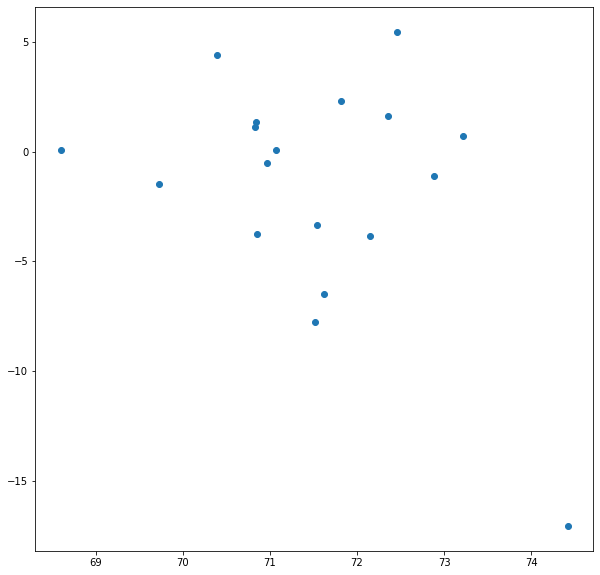

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(y_pred, residuals)
plt.show()

In [22]:
mae2                 = mean_absolute_error(y_test[1:], y_pred[1:])

In [23]:
mae2

2.6779626730490627

In [24]:
residuals = y_pred[1:]-y_test[1:]

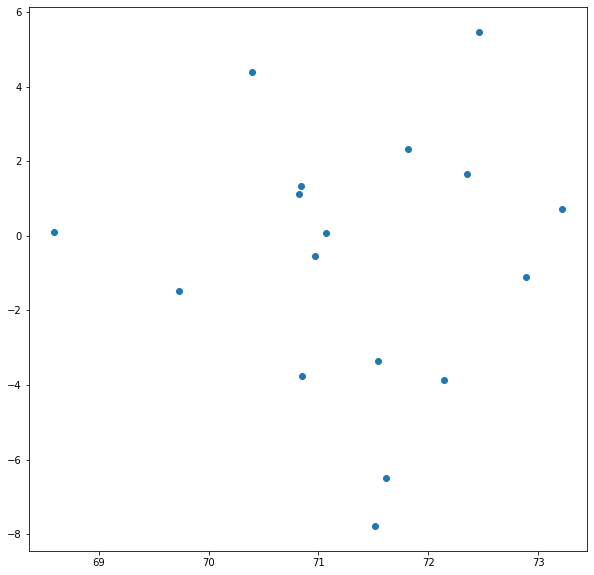

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(y_pred[1:], residuals)
plt.show()

In [27]:
residuals

array([-0.53519473,  0.71388451, -1.1118605 ,  1.33893434,  2.31897987,
        4.39411053, -3.85365562,  5.46352287,  0.07359929, -6.48350719,
       -7.78266693,  0.09629229, -3.35830223,  1.65021003,  1.1281288 ,
       -3.75276588, -1.46974984])

In [29]:
y_pred[1:]

array([70.96480527, 73.21388451, 72.8881395 , 70.83893434, 71.81897987,
       70.39411053, 72.14634438, 72.46352287, 71.07359929, 71.61649281,
       71.51733307, 68.59629229, 71.54169777, 72.35021003, 70.8281288 ,
       70.84723412, 69.73025016])

In [30]:
y_pred

array([74.42228126, 70.96480527, 73.21388451, 72.8881395 , 70.83893434,
       71.81897987, 70.39411053, 72.14634438, 72.46352287, 71.07359929,
       71.61649281, 71.51733307, 68.59629229, 71.54169777, 72.35021003,
       70.8281288 , 70.84723412, 69.73025016])

In [32]:
sys.path.append("..")
from pipelines import svm_pipe

FileNotFoundError: [Errno 2] No such file or directory: './models/200423_svm_model.joblib'

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import joblib
from AntiBERTy import AntiBERTyEncoder
import pandas as pd

# load models
svm = joblib.load('../models/200423_svm_model.joblib')

data72 = pd.read_csv('../data/combined_datasets_72.csv')

scaler = joblib.load('../models/150423_standscaler.joblib')


def select_columns(X):
    # Replace this list with the names of the columns you want to select
    selected_features = data72.columns
    X.columns = ['{}'.format(i) for i in range(len(X.columns))]
    X_new = X[selected_features]
    X_new.columns = ['{}'.format(i) for i in range(len(X_new.columns))]
    return X_new


# svm pipeline with standard scaler
svm_pipe = Pipeline([
    ('encoder', AntiBERTyEncoder()),
    ('selector', FunctionTransformer(select_columns)),
    #('scaler', scaler),
    ('svm', svm)])



    The code, data, and weights for this work are made available for non-commercial use 
    (including at commercial entities) under the terms of the JHU Academic Software License 
    Agreement. For commercial inquiries, please contact dmalon11[at]jhu.edu.
    License: https://github.com/Graylab/IgFold/blob/main/LICENSE.md
    
Loading 4 IgFold models...
Using device: cpu
Loading C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\Lib\site-packages\igfold\trained_models/IgFold\igfold_1.ckpt...
Loading C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\Lib\site-packages\igfold\trained_models/IgFold\igfold_2.ckpt...
Loading C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\Lib\site-packages\igfold\trained_models/IgFold\igfold_3.ckpt...
Loading C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\Lib\site-packages\igfold\trained_models/IgFold\igfold_5.ckpt...
Successfully loaded 4 IgFold models.
Loaded AntiBERTy model.


In [17]:
X = ['ELQMTQSPASLAVSLGQRATISCKASQSVDYDGDSYMNWYQQKPGQPPKLLIYAASNLESGIPARFSGSGSRTDFTLTINPVETDDVATYYCQQSHEDPYTFGGGTKLEIK', 'LESGAELVKPGASVKLSCKASGYIFTTYWMQWVKQRPGQGLEWIGEIHPSNGLTNYNEKFKSKATLTVDKSSTTAYMQLSSLTSEDSAVYYCSKGRELGRFAYWGQGTLVTVSA']

In [19]:
x = svm_pipe.predict(X)

Completed embedding in 3.42 seconds.


In [25]:
import numpy as np

In [27]:
p=(x.astype(float))

In [32]:
for i in x:
    print(i)

70.7870250270091


In [11]:
type(data72.columns)

pandas.core.indexes.base.Index

In [1]:
import sys
sys.path.append("..")
from SVM import svm_cv
import pandas as pd
from tools import data_parser as dp

In [2]:
bert_data_72 = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data_72)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

Validation MAE: 4.242 (0.849)
Validation R2: -0.008 (0.135)
Validation Pearsonr: 0.217 (0.246)
Test MAE: 3.942
Test R2: 0.230
Test Pearsonr: 0.692


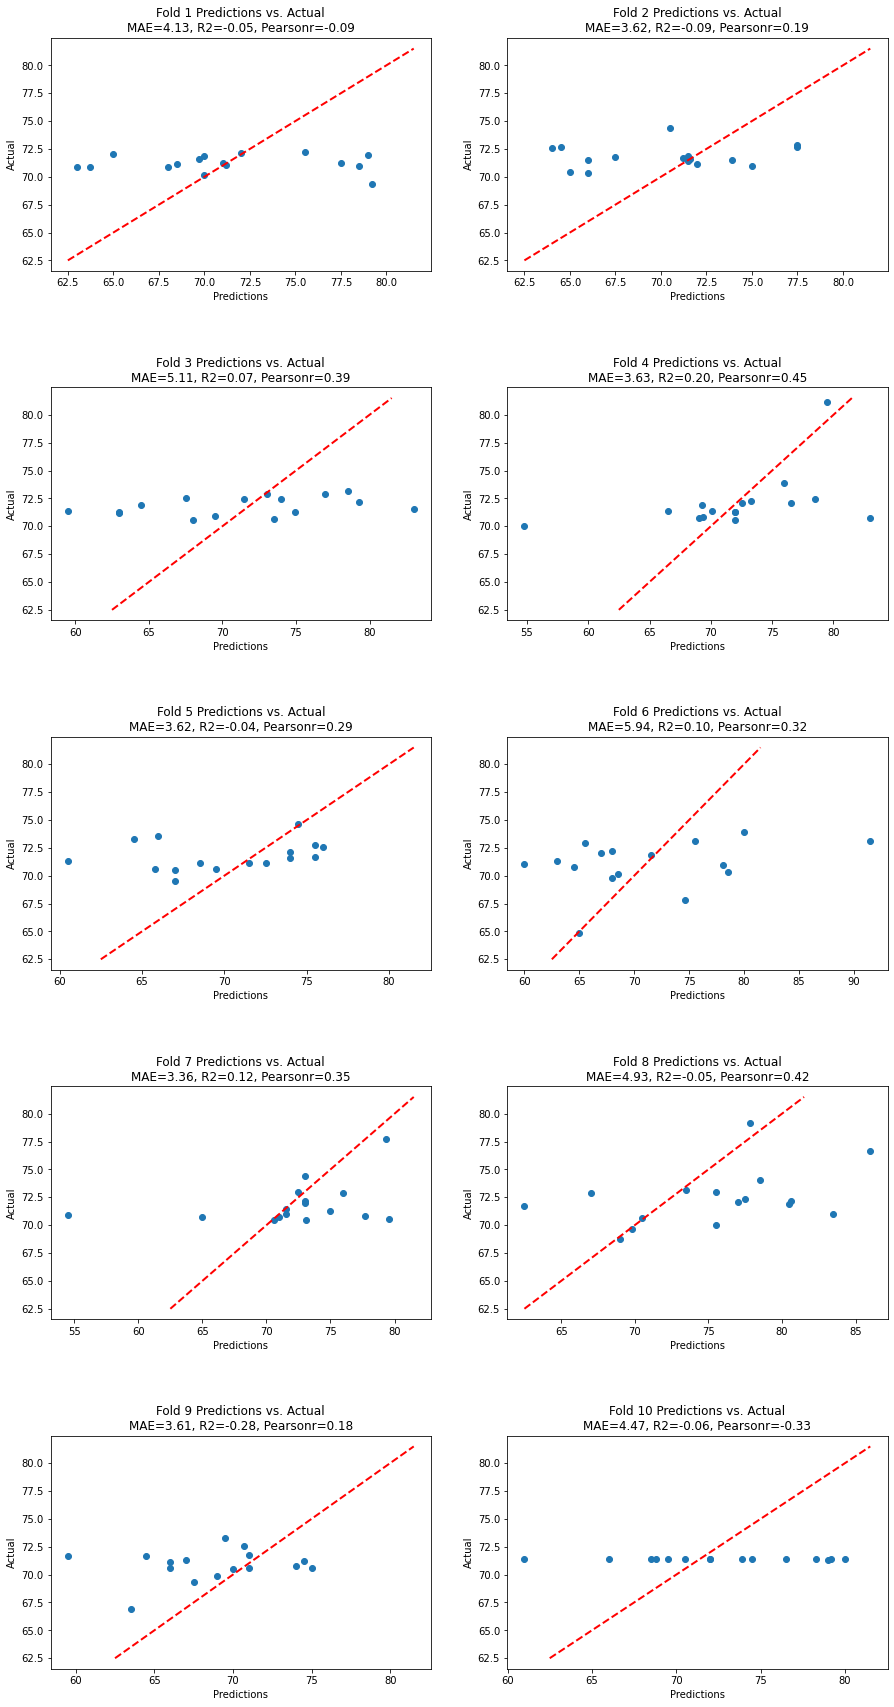

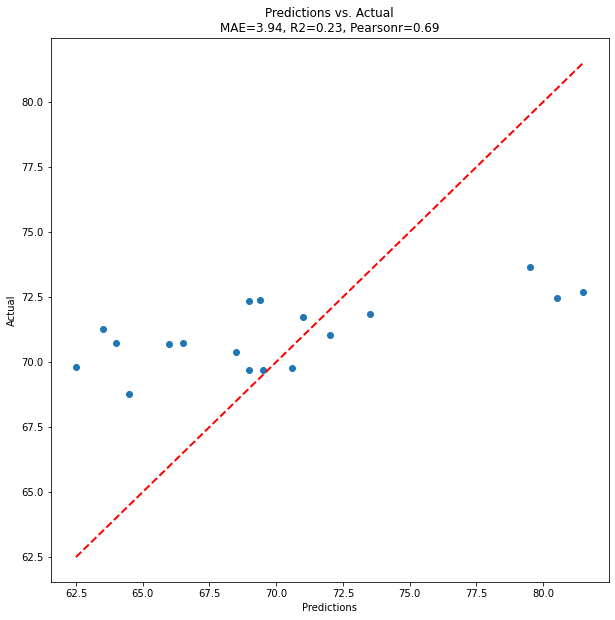

In [4]:
svm_model = svm_cv(X,y)

In [6]:
import joblib

In [7]:
joblib.dump(svm_model, '../models/200423_svm_model.joblib')

['../models/200423_svm_model.joblib']